# Case study for the MA2 process 

We will now follow the example in Learning Summary Statistic for Approximate Bayesian Computation via Deep
Neural Network [inster link here] and use DNNs to learn the summary statistics for the MA2 process. The network archtitures that we will consider are: MLP, MLP with data reduction, and CNN.

#### The MA2 process 

The MA2 process follows

$y_i = z_i + \theta_1 z_{i-1} + \theta_2 z_{i−2}, z_i \sim N(0, 1).$

The MA2 process is identifyable if we have that 

$\theta_1 \in [−2, 2], \theta_2 \in [−1, 1], \theta_2 \pm \theta_1 \ge −1.$

Hence, we will defined the uniform prior for the MA2 process to the triangle above.

## Setup

In [1]:
# set path
cd("..") # set correct working directory 
pwd() # this path should go to the folder with the .git file 

# load packages 
using Pkg
using PyPlot
using DataFrames
using CSV
using KernelDensity
using Distributions
using Statistics

# load files 
include(pwd()*"/src/MA2/set_up.jl")

# load data
y_test = Matrix(CSV.read("data/MA2/y_test.csv"; allowmissing=:auto));

Loading MA2 model


┌ Warning: indexing with colon as row will create a copy in the future use df[col_inds] to get the columns without copying
│   caller = top-level scope at none:0
└ @ Core none:0


Compute exact posterior

In [2]:
posterior_exact = Matrix(CSV.read("data/MA2/exact_mcmc_post.csv"; allowmissing=:auto))'

z_exact = kde((posterior_exact[1,:], posterior_exact[2,:]))

h1_exact = kde(posterior_exact[1,:])
h2_exact = kde(posterior_exact[2,:]);

## Network performance 

###  ABC with hand-pricked summary stats

Load results. 

In [3]:
posterior_summary_stats = Matrix(CSV.read("data/MA2/abcrs_post.csv"; allowmissing=:auto))'
h1_summary = kde(posterior_summary_stats[1,:])
h2_summary = kde(posterior_summary_stats[2,:]);

#### Posterior inference  

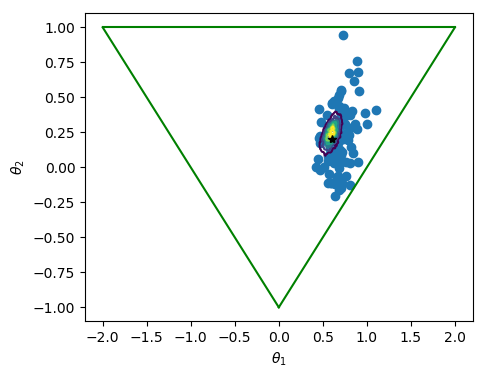

In [4]:
# posterior 
PyPlot.figure(figsize=(5,4))
PyPlot.plot((0,-2),(-1,1), "g")
PyPlot.plot((-2,2),(1,1), "g")
PyPlot.plot((0,2),(-1,1), "g")
PyPlot.scatter(posterior_summary_stats[1,:],posterior_summary_stats[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$");

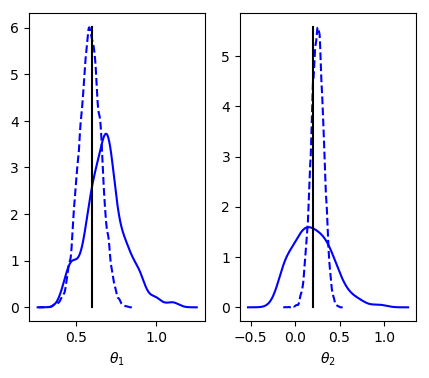

In [5]:
# Marginal posterior
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plot(h1_summary.x,h1_summary.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_summary.x,h2_summary.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

### Results using MLP

#### Network info

Structure: 100 (input) -> 100 -> 100 -> 50 -> 2 (output), fully connected, relu activation.

Number weights: 25352 

Training time: 4026.31 sec (1.2 h).

ABC runtime: 75.54 sec.

Load results. 

In [6]:
loss_training_dnn_simple = Matrix(CSV.read("data/MA2/loss_vec_training_DNN_simple_1.csv"; allowmissing=:auto))
loss_val_dnn_simple = Matrix(CSV.read("data/MA2/loss_vec_val_DNN_simple_1.csv"; allowmissing=:auto))
predictions_dnn_simple = Matrix(CSV.read("data/MA2/predictions_DNN_simple_1.csv"; allowmissing=:auto))

posterior_simple_DNN = Matrix(CSV.read("data/MA2/DNN_simple_1_abcrs_post.csv"; allowmissing=:auto))'
h1_DNN = kde(posterior_simple_DNN[1,:])
h2_DNN = kde(posterior_simple_DNN[2,:]);

#### Network performance  

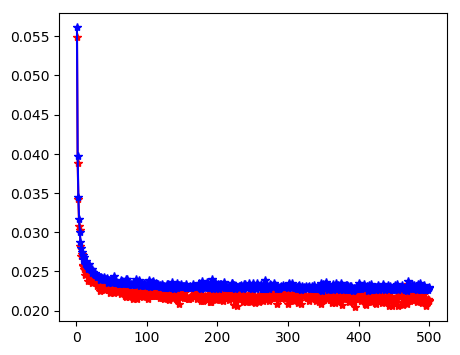

In [7]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_simple), loss_training_dnn_simple[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_simple), loss_val_dnn_simple[:], "*-b");

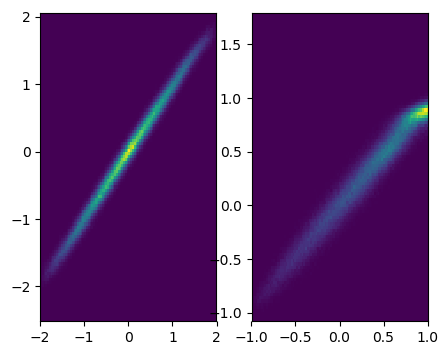

In [8]:
# plot predictions
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_simple[:,1], bins=(100, 100))
PyPlot.subplot(122)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_simple[:,2], bins=(100, 100));

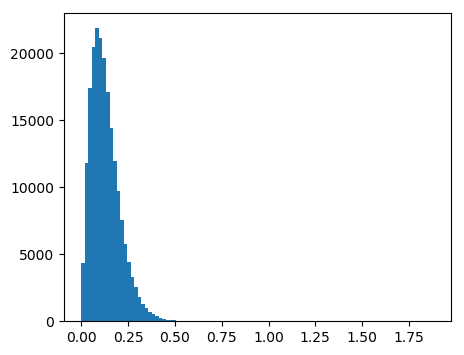

In [9]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_simple - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

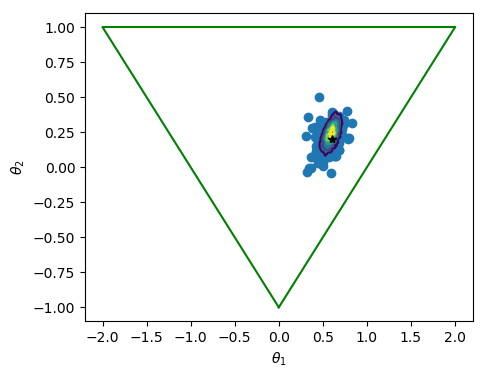

In [10]:
# Posterior
PyPlot.figure(figsize=(5,4))
PyPlot.plot((0,-2),(-1,1), "g")
PyPlot.plot((-2,2),(1,1), "g")
PyPlot.plot((0,2),(-1,1), "g")
PyPlot.scatter(posterior_simple_DNN[1,:],posterior_simple_DNN[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$");

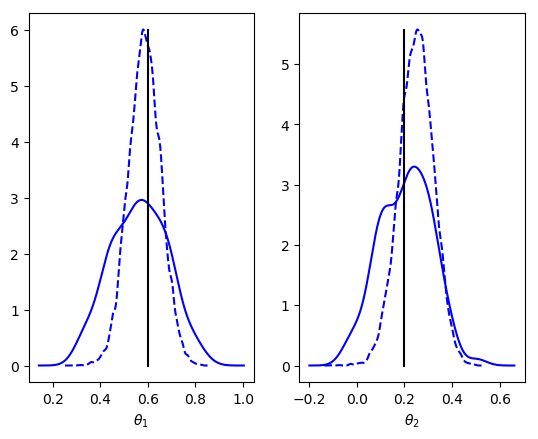

In [11]:
# Marginal posterior
PyPlot.figure()
PyPlot.subplot(121)
PyPlot.plot(h1_DNN.x,h1_DNN.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_DNN.x,h2_DNN.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

### Block-permutation DeepSets 

#### Network info

Structure: 11 (input) -> 100 -> 50 -> 10 (output inner), summation, then 10 (input outer) -> 50 -> 50 -> 20 -> 2 (output)

Number weights: 11422

Training time: 24322.61 sec (6.8 h)

ABC runtime: 136.52

Load results. 

In [12]:
loss_training_bp_deepsets = Matrix(CSV.read("data/MA2/loss_vec_training_bp_deepsets_1.csv"; allowmissing=:auto))
loss_val_dnn_bp_deepsets = Matrix(CSV.read("data/MA2/loss_vec_val_bp_deepsets_1.csv"; allowmissing=:auto))
predictions_bp_deepsets = Matrix(CSV.read("data/MA2/predictions_bp_deepsets_1.csv"; allowmissing=:auto))

posterior_bp_deepsets = Matrix(CSV.read("data/MA2/bp_deepsets_1_abcrs_post.csv"; allowmissing=:auto))'
h1_bp_deepsets = kde(posterior_bp_deepsets[1,:])
h2_bp_deepsets = kde(posterior_bp_deepsets[2,:]);

#### Network performance  

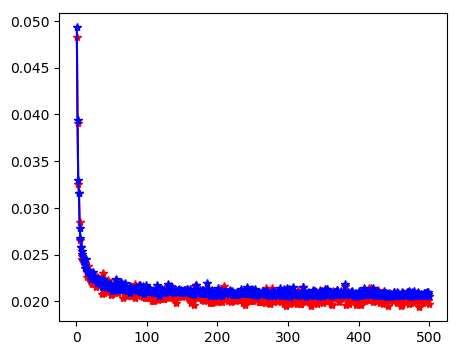

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f22a59bcda0>

In [13]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_simple), loss_training_bp_deepsets[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_simple), loss_val_dnn_bp_deepsets[:], "*-b")


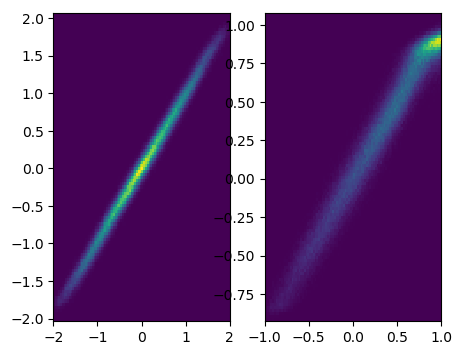

In [14]:
# plot predictions
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plt[:hist2d](y_test[:,1], predictions_bp_deepsets[:,1], bins=(100, 100))
PyPlot.subplot(122)
PyPlot.plt[:hist2d](y_test[:,2], predictions_bp_deepsets[:,2], bins=(100, 100));

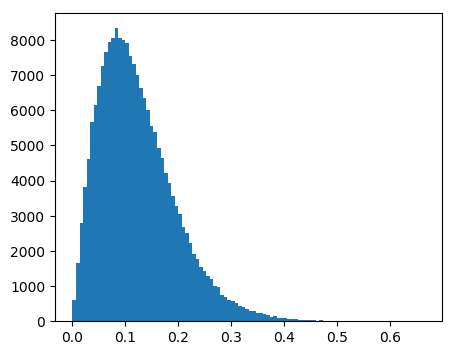

In [15]:
# check pred error
loss_test = sqrt.(sum((predictions_bp_deepsets - y_test).^2,dims = 2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);


#### Posterior inference  

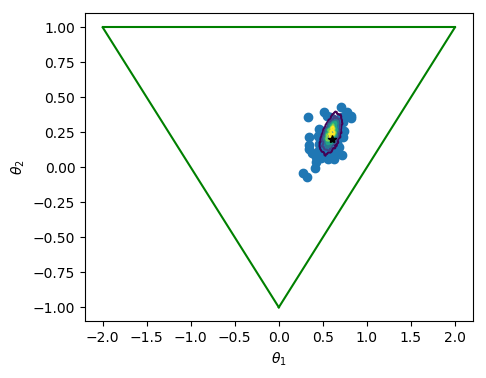

In [16]:
# posterior
PyPlot.figure(figsize=(5,4))
PyPlot.plot((0,-2),(-1,1), "g")
PyPlot.plot((-2,2),(1,1), "g")
PyPlot.plot((0,2),(-1,1), "g")
PyPlot.scatter(posterior_bp_deepsets[1,:],posterior_bp_deepsets[2,:])
PyPlot.plt[:contour](z_exact.x, z_exact.y, z_exact.density)
PyPlot.plot(θ_true[1],θ_true[2], "k*")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.ylabel(L"$\theta_2$");

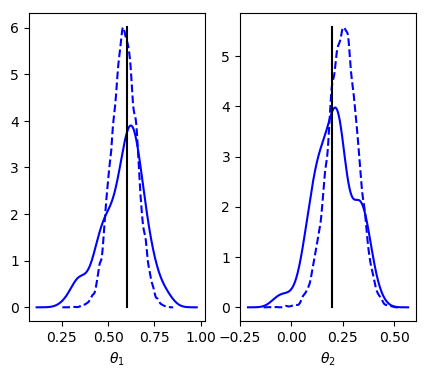

In [17]:
# marginal posterior
PyPlot.figure(figsize=(5,4))
PyPlot.subplot(121)
PyPlot.plot(h1_bp_deepsets.x,h1_bp_deepsets.density, "b")
PyPlot.plot(h1_exact.x,h1_exact.density, "b--")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1_exact.density)), "k")
PyPlot.xlabel(L"$\theta_1$")
PyPlot.subplot(122)
PyPlot.plot(h2_bp_deepsets.x,h2_bp_deepsets.density, "b")
PyPlot.plot(h2_exact.x,h2_exact.density, "b--")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2_exact.density)), "k")
PyPlot.xlabel(L"$\theta_2$");

## Posterior inference results (over multiple data sets)

Set up, load true parameter values, and set exact posterior means.

In [18]:
include(pwd()*"/src/utilities/multivar_cramer.jl")

θ_1_true, θ_2_true = θ_true

2-element Array{Float64,1}:
 0.6
 0.2

### Exact posterior 

In [19]:
posterior_exact = Array(Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_exact.csv"; allowmissing=:auto))');

### ABC with hand-pricked summary stats

Posterior mean loss and true paramter loss for.

In [20]:
posterior = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))


Ground-truth mean loss:
0.049061483842672754
0.07084150835281834


Calc multivariate Cramer test statistics.

In [21]:
test_stats_abc = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_abc[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

### MLP

Posterior mean loss and true paramter loss for DNN.

In [22]:
posterior = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_DNN_simple_1.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))


Ground-truth mean loss:
0.012433005374793882
0.029157215880860874


Calc multivariate Cramer test statistics.

In [23]:
test_stats_mlp = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_mlp[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

### BSN

Posterior mean loss and true paramter loss for BP-Deepsets.

In [24]:
posterior = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_bp_deepsets_1.csv"; allowmissing=:auto))

θ_1_hat = mean(posterior[1:2:end,:],dims=1)
θ_2_hat = mean(posterior[2:2:end,:],dims=1)

# loss

println("Ground-truth mean loss:")
println(sqrt(mean((θ_1_hat.-θ_1_true).^2)))
println(sqrt(mean((θ_2_hat.-θ_2_true).^2)))

Ground-truth mean loss:
0.01094577556722555
0.02217156253281875


Calc multivariate Cramer test statistics.

In [25]:
test_stats_bp_deepsets = zeros(size(posterior,2))
idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_bp_deepsets[idx] = multvar_cramer_stat(posterior[i:i+1,:],posterior_exact[i:i+1,1:500])
end

#### Compare multivariate Cramer test statistics

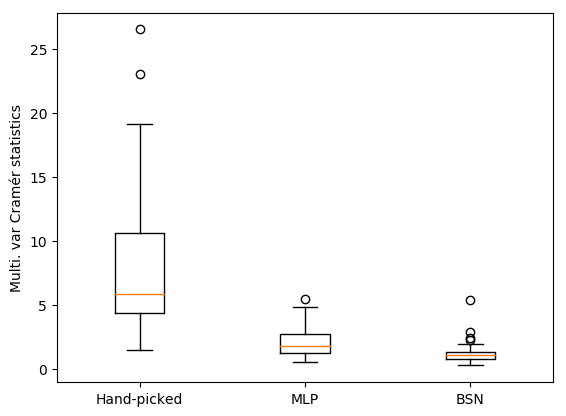

PyObject Text(24,0.5,'Multi. var Cramér statistics')

In [26]:
data = zeros(length(test_stats_abc),3)

data[:,1] = test_stats_abc
data[:,2] = test_stats_mlp
data[:,3] = test_stats_bp_deepsets

PyPlot.figure()
PyPlot.boxplot(data)
PyPlot.xticks([1, 2, 3], ["Hand-picked", "MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistics")

## Network performance with different traning data size

Load results for MLP and BP-Deepsets.

In [27]:
posterior_2 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_DNN_simple_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_DNN_simple_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_DNN_simple_4.csv"; allowmissing=:auto))

test_stats_DNN_simple_2 = zeros(size(posterior,2))
test_stats_DNN_simple_3 = zeros(size(posterior,2))
test_stats_DNN_simple_4 = zeros(size(posterior,2))

idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_DNN_simple_2[idx] = multvar_cramer_stat(posterior_2[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_DNN_simple_3[idx] = multvar_cramer_stat(posterior_3[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_DNN_simple_4[idx] = multvar_cramer_stat(posterior_4[i:i+1,:],posterior_exact[i:i+1,1:500])
end

posterior_2 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_bp_deepsets_2.csv"; allowmissing=:auto))
posterior_3 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_bp_deepsets_3.csv"; allowmissing=:auto))
posterior_4 = Matrix(CSV.read("data/MA2/posteriors_multiple_data_sets_bp_deepsets_4.csv"; allowmissing=:auto))

test_stats_bp_deepsets_2 = zeros(size(posterior,2))
test_stats_bp_deepsets_3 = zeros(size(posterior,2))
test_stats_bp_deepsets_4 = zeros(size(posterior,2))

idx = 0
for i in 1:2:size(posterior,1)
    global idx = idx + 1
    global test_stats_bp_deepsets_2[idx] = multvar_cramer_stat(posterior_2[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_bp_deepsets_3[idx] = multvar_cramer_stat(posterior_3[i:i+1,:],posterior_exact[i:i+1,1:500])
    global test_stats_bp_deepsets_4[idx] = multvar_cramer_stat(posterior_4[i:i+1,:],posterior_exact[i:i+1,1:500])
end


Store test statistics in matrices. 

In [28]:
data2 = zeros(length(test_stats_abc),2)

data2[:,1] = test_stats_DNN_simple_2
data2[:,2] = test_stats_bp_deepsets_2

data3 = zeros(length(test_stats_abc),2)

data3[:,1] = test_stats_DNN_simple_3
data3[:,2] = test_stats_bp_deepsets_3

data4 = zeros(length(test_stats_abc),2)

data4[:,1] = test_stats_DNN_simple_4
data4[:,2] = test_stats_bp_deepsets_4

data_mean_stats = [mean(data[:,2:end],dims=1); mean(data2,dims=1); mean(data3,dims=1); mean(data4,dims=1)];

Compare results training on 10^6 observations. 

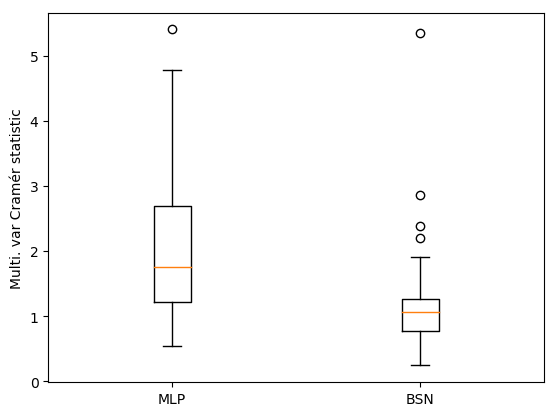

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [29]:
PyPlot.figure()
PyPlot.boxplot(data[:,2:end])
PyPlot.xticks([1, 2], ["MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^5 observations. 

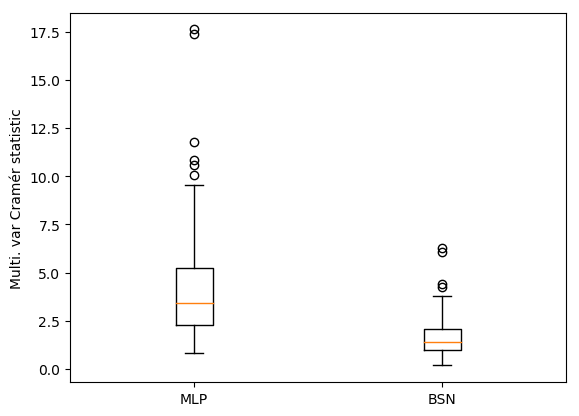

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [30]:
PyPlot.figure()
PyPlot.boxplot(data2)
PyPlot.xticks([1, 2], ["MLP",  "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^4 observations. 

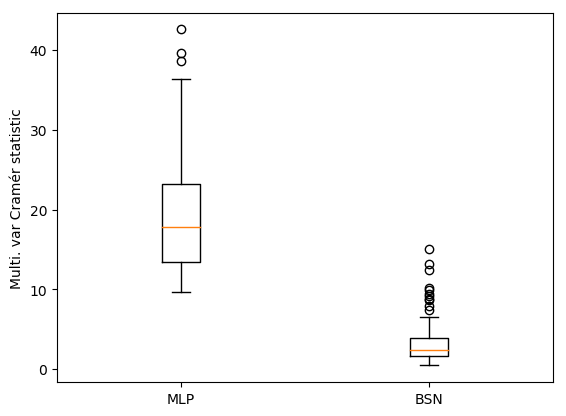

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [31]:
PyPlot.figure()
PyPlot.boxplot(data3)
PyPlot.xticks([1, 2], ["MLP", "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Compare results training on 10^3 observations. 

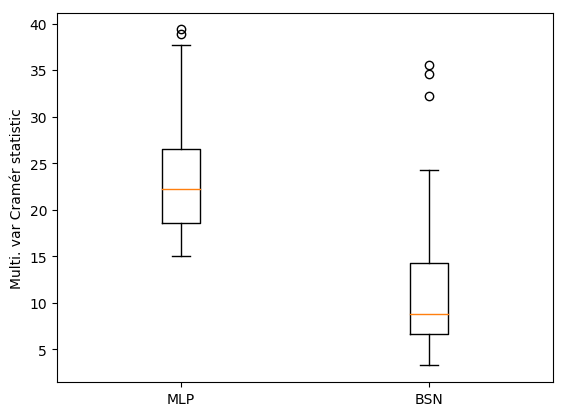

PyObject Text(24,0.5,'Multi. var Cramér statistic')

In [32]:
PyPlot.figure()
PyPlot.boxplot(data4)
PyPlot.xticks([1,2], ["MLP",  "BSN"]);
PyPlot.ylabel("Multi. var Cramér statistic")

Plot multi. var Cramer statistics as function of the training data size. Blue line MLP, red line CNN, and green line BP-Deepsets.

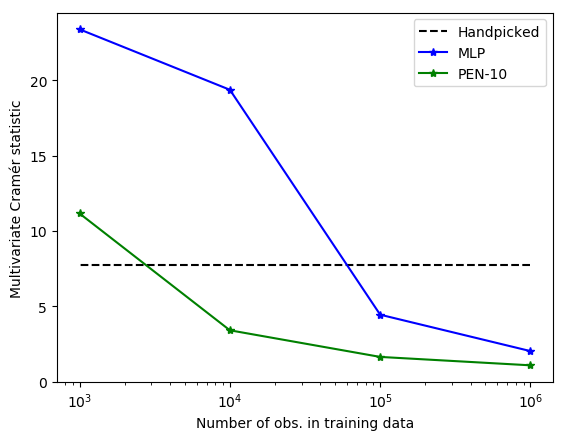

In [33]:
# plotting
x_scale = [10^6, 10^5, 10^4, 10^3]

PyPlot.figure()
PyPlot.semilogx(x_scale,[mean(data[:,1]);mean(data[:,1]);mean(data[:,1]);mean(data[:,1])], "--k")
PyPlot.semilogx(x_scale, data_mean_stats[:,1], "*-b")
PyPlot.semilogx(x_scale, data_mean_stats[:,2], "*-g")
PyPlot.xlabel("Number of obs. in training data")
PyPlot.ylabel("Multivariate Cramér statistic")
PyPlot.legend(("Handpicked","MLP","PEN-10"))
PyPlot.savefig("figures/res_ma2.eps", format="eps", dpi=1000)